In [1]:
#3B.2.1 тапсырмасы Дұрыс және қате классификацияланған жаңалықтар саны
TP = 6  # Дұрыс анықталған саяси жаңалықтар
TN = 14 # Дұрыс анықталған экономикалық жаңалықтар
FP = 9  # Қате экономикалық деп белгіленген саяси жаңалықтар
FN = 6  # Қате саяси деп белгіленген экономикалық жаңалықтар

# Accuracy формуласы
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Нәтижені шығару
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5714


In [2]:
#3B.2.2 тапсырмасы
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Мәліметтерді жүктеу
data = load_iris()
X, y = data.data, data.target  

# Оқыту және тестке бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Логистикалық регрессия моделі
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Болжау және дәлдік (Accuracy) есептеу
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)

# Нәтиже шығару
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.9778


In [3]:
#3B.3. Классификация. Практика
import pandas as pd

# Мәліметтерді дұрыс бөлгішпен жүктеу (нүктелі үтір болуы мүмкін)
df = pd.read_csv(r"C:\Users\14ken\Downloads\train_mobile.csv", sep=";")

# Деректердің алғашқы жолдарын қарап шығу
print(df.head())

# Сандық айнымалыларды таңдау
df = df.apply(pd.to_numeric, errors='ignore')

# Корреляцияны есептеу
corr = df.corr(numeric_only=True)

# price_range айнымалысымен ең жоғары корреляцияға ие 5 белгіні таңдау
top_features = corr["price_range"].abs().sort_values(ascending=False).index[1:6]

# Нәтижені шығару
print("Ең маңызды 5 белгі:", list(top_features))





   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Таңдалған белгілер
features = ['ram', 'battery_power', 'px_width', 'px_height', 'touch_screen']
X = df[features]  # Тәуелсіз айнымалылар
y = df["price_range"]  # Нысаналы айнымалы (мақсат)

# Оқыту және тестке бөлу (80% - train, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

# Логистикалық регрессия моделін құру және үйрету
model = LogisticRegression()
model.fit(X_train, y_train)

# Болжау және дәлдік (accuracy) есептеу
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# Нәтижені шығару
print(f"Модельдің дәлдігі (Accuracy): {acc:.4f}")


Модельдің дәлдігі (Accuracy): 0.9875


In [5]:
#3B.3.3 тапсырмасы — Метрика мәні
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Таңдалған белгілер
features = ["ram", "battery_power", "px_width", "px_height", "touch_screen"]
X = df[features]
y = df["price_range"]

# Мәліметтерді бөлу (тест 20%, random_state=31)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

# Логистикалық регрессия моделін жаттықтыру
model = LogisticRegression()
model.fit(X_train, y_train)

# Болжау
y_pred = model.predict(X_test)

# Precision метрикасын есептеу
precision = precision_score(y_test, y_pred)

# Нәтиже шығару (4 таңбалы дәлдік)
print(f"Precision: {precision:.4f}")


Precision: 0.9859


In [6]:
#3B.5.3 тапсырмасы
import numpy as np

# Берілген мәндер
y_pred = np.array([0.2, 0.8, 1.0, 0.6])  # Болжау
y_true = np.array([0, 0, 1, 1])  # Шынайы мәндер

# Өте кіші мән (log(0) қателерін болдырмау үшін)
epsilon = 1e-15  # 10^(-15) өте кішкентай сан

# y_pred мәндерін 0 мен 1 аралығында қалдыру (0.000000000000001 < y_pred < 0.999999999999999)
y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

# LogLoss формуласы
logloss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Нәтижені екі таңбаға дейін дөңгелектеу
print(f"LogLoss: {logloss:.2f}")



LogLoss: 0.59


In [7]:
#3B.5.4 тапсырмасы
import numpy as np

# Болжанған ықтималдықтар (3 сынып)
y_pred = np.array([
    [0.2, 0.3, 0.5],
    [0, 0, 1],
    [0.1, 0, 0.9]
])

# Нақты сыныптар (дұрыс one-hot кодтау)
y_true = np.array([
    [0, 0, 1],  # 3-сынып
    [0, 0, 1],  # 3-сынып
    [1, 0, 0]   # 1-сынып
])

# log(0) қатесін болдырмау
epsilon = 1e-15
y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

# LogLoss формуласы
logloss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Нәтижені екі таңбаға дейін дөңгелектеу
print(f"LogLoss: {logloss:.2f}")


LogLoss: 1.00


In [8]:
# Тапсырма 3B.6.1 
import pandas as pd

# Деректерді жүктеу
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'salary']

adult = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                    names=columns, sep=",", skipinitialspace=True)

# Алғашқы 5 жолды қарау
print(adult.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [9]:
# Сандық емес бағандарды dummy-переменные (one-hot encoding) түріне айналдыру
adult = pd.get_dummies(adult, drop_first=True)

# Мақсатты айнымалыны (salary) бинарлық түрге ауыстыру
adult["salary"] = adult["salary_>50K"]
adult = adult.drop(columns=["salary_>50K"])  # Артық бағанды жоямыз

# Нәтижені шығару
print(adult.head())


   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Puerto-Rico  \
0              False  ...                

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Белгілер мен мақсатты айнымалыны бөлу
X = adult.drop(columns=["salary"])
y = adult["salary"]

# Мәліметтерді оқу және тест жиындарына бөлу (80% - train, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логистикалық регрессия моделін құру
model = LogisticRegression(max_iter=500)  # Итерация санын көбейту (конвергенция үшін)
model.fit(X_train, y_train)

# Болжау жасау
y_pred = model.predict(X_test)

# F1-score есептеу
f1 = f1_score(y_test, y_pred)

# Нәтижені шығару
print(f"F1-score: {f1:.4f}")


F1-score: 0.4298


In [11]:
# 3B.6.2 Тапсырмасы – Қателіктер матрицасын есептеу (Confusion Matrix)
from sklearn.metrics import confusion_matrix

# Қателіктер матрицасын есептеу
cm = confusion_matrix(y_test, y_pred)

# Нәтижені шығару
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[4613  329]
 [1051  520]]


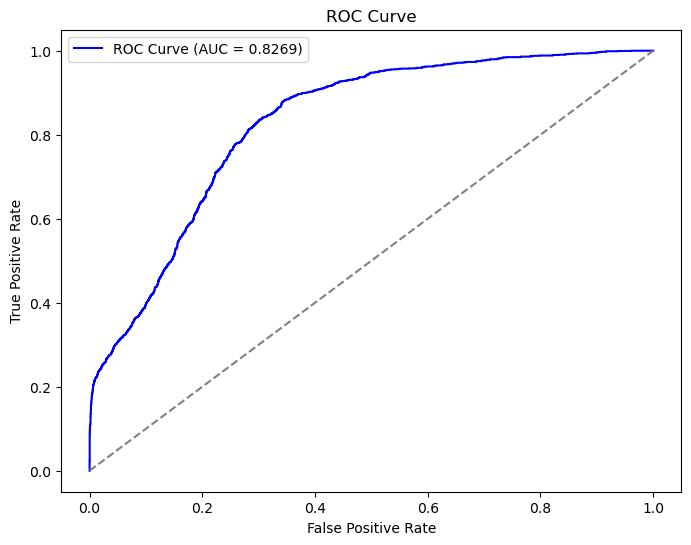

ROC AUC Score: 0.8269


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Ықтималдықты есептеу (predict_proba қолдану керек)
y_prob = model.predict_proba(X_test)[:, 1]

# ROC-қисық тұрғызу
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# График салу
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# AUC мәнін шығару
print(f"ROC AUC Score: {auc:.4f}")


In [13]:
# 3B.6.4 Тапсырмасы – Регуляризациясыз логистикалық регрессияны үйретіп, F1-score анықтау
# Регуляризациясыз логистикалық регрессия (penalty=None)
model_no_reg = LogisticRegression(penalty=None, max_iter=500)
model_no_reg.fit(X_train, y_train)

# Болжау жасау
y_pred_no_reg = model_no_reg.predict(X_test)

# F1-score есептеу
f1_no_reg = f1_score(y_test, y_pred_no_reg)

# Нәтижені шығару
print(f"F1-score (регуляризациясыз): {f1_no_reg:.4f}")


F1-score (регуляризациясыз): 0.3939


In [14]:
# 3B.6.5 Тапсырмасы – Регуляризация коэффициентін таңдау (L2)
import numpy as np

# Коэффициенттердің тізімі
C_values = np.arange(0.01, 1.01, 0.01)

best_f1 = 0
best_C = None

# Әртүрлі L2 коэффициенттерімен модельді сынау
for C in C_values:
    model = LogisticRegression(C=C, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_C = C

# Нәтижені шығару
print(f"Ең жақсы F1-score: {best_f1:.4f}, ең жақсы C: {best_C:.2f}")


Ең жақсы F1-score: 0.6142, ең жақсы C: 0.37


In [15]:
import pandas as pd

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'salary']

adult = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                    names=columns, sep=",", skipinitialspace=True)


In [16]:
#3B.6.6 Тапсырмасы – native-country бағанын өңдеу

# Елдердің таралуын тексеру
country_counts = adult["native-country"].value_counts()

# 100 жазбадан аз елдерді "other" деп белгілеу
adult["native-country"] = adult["native-country"].apply(lambda x: "other" if country_counts[x] < 100 else x)

# Өзгерістерді тексеру
print(adult["native-country"].value_counts())


native-country
United-States    29170
other             1389
Mexico             643
?                  583
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Name: count, dtype: int64


In [22]:
print(adult.select_dtypes(include=['object']).head())


  native-country
0  United-States
1  United-States
2  United-States
3  United-States
4          other


In [17]:
# Барлық категориялық айнымалыларды dummy-кодтау Dummy-кодтауды қажет ететін айнымалылар
categorical_features = ["workclass", "education", "marital-status", "occupation",
                        "relationship", "race", "sex"]  # "native-country" өшірілді

# Dummy-кодтау жасау
adult = pd.get_dummies(adult, columns=categorical_features, drop_first=True)

# Нәтижені тексеру
print(adult.head())


   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  native-country salary  workclass_Federal-gov  workclass_Local-gov  ...  \
0  United-States  <=50K                  False                False  ...   
1  United-States  <=50K                  False                False  ...   
2  United-States  <=50K                  False                False  ...   
3  United-States  <=50K                  False                False  ...   
4          other  <=50K                  False                False  ...   

   relationship_Not-in-family  relationship_Other-relative  \
0                 

In [18]:
# "salary" бағанын бинарлық түрге ауыстыру
adult["salary"] = adult["salary"].apply(lambda x: 1 if x == ">50K" else 0)

# Өзгерістерді тексеру
print(adult["salary"].value_counts())  # 0 және 1 болуы керек


salary
0    24720
1     7841
Name: count, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Белгілер мен мақсатты айнымалыны бөліп алу
X = adult.drop(columns=["salary"])  # Барлық өңделген белгілер
y = adult["salary"]  # Мақсатты айнымалы (0 немесе 1)

# Мәліметтерді бөлу (80% - train, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логистикалық регрессияны іске қосу (C = 0.37)
best_C = 0.37
model = LogisticRegression(C=best_C, max_iter=500)
model.fit(X_train, y_train)

# Болжау жасау
y_pred = model.predict(X_test)

# Жаңа F1-score есептеу
new_f1 = f1_score(y_test, y_pred)

# Нәтижені шығару
print(f"Жаңа F1-score (барлық категориялық бағандар int түріне өзгертілгеннен кейін): {new_f1:.4f}")



Жаңа F1-score (барлық категориялық бағандар int түріне өзгертілгеннен кейін): 0.3916


In [28]:
# L2-регуляризация коэффициентін оңтайландыру
# Мүмкін C = 0.37 параметрі енді жақсы нәтиже бермеуі мүмкін
#C параметрін 0.01-ден 1.0-ге дейін сынап көрейік.
import numpy as np
from sklearn.metrics import f1_score

# Әртүрлі L2 коэффициенттерімен модельді сынау
C_values = np.arange(0.01, 1.01, 0.01)
best_f1 = 0
best_C = None

for C in C_values:
    model = LogisticRegression(C=C, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_C = C

# Ең жақсы нәтижені шығару
print(f"Ең жақсы F1-score: {best_f1:.4f}, ең жақсы C: {best_C:.2f}")
#F1-score көрсеткішін 0.3916-дан 0.6158-ге дейін жақсарды

Ең жақсы F1-score: 0.6158, ең жақсы C: 0.40


In [29]:
#Тапсырма 5.2.3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Деректерді жүктеу
df = pd.read_csv("C:\\Users\\14ken\\Downloads\\bill_authentication.csv")

# Тәуелсіз айнымалылар (X) және мақсатты айнымалы (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Мәліметтерді оқыту және тестке бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Шешім ағашын құру
clf = DecisionTreeClassifier(max_depth=3, max_features=2, min_samples_leaf=5, random_state=17)
clf.fit(X_train, y_train)

# Болжау жасау
y_pred = clf.predict(X_test)

# F1-score есептеу
f1 = f1_score(y_test, y_pred)

# Үш ондық орынға дейін дөңгелектеу
print(f"F1-score: {round(f1, 3)}")


F1-score: 0.866


In [31]:
# Тапсырма 5.2.4
# Келесі белгілер векторына ие банкнотаны классификациялаңыз:
# Жаңа банкнота үшін белгілер векторы
new_sample = np.array([[2.04378, -0.38422, 1.437292, 0.76421]])

# Банкнотаны классификациялау
predicted_class = clf.predict(new_sample)

print("Банкнотаның болжанған класы:", predicted_class[0])


Банкнотаның болжанған класы: 0


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [33]:
#Тапсырма 5.2.5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Деректерді жүктеу
file_path = r"C:\Users\14ken\Downloads\petrol_consumption.csv"
df = pd.read_csv(file_path)

# Тәуелсіз айнымалылар (X) және мақсатты айнымалы (y)
X = df.drop(columns=['Petrol_Consumption'])  # Нысан белгілері
y = df['Petrol_Consumption']  # Болжанатын мән

# Мәліметтерді оқыту және тест жиынына бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Шешім ағашы регрессиясын құру
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

# Болжау жасау
y_pred = reg_tree.predict(X_test)

# RMSE есептеу
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Ағаштың тереңдігін анықтау
tree_depth = reg_tree.get_depth()

# Нәтижені шығару
print(f"RMSE: {round(rmse, 2)}")
print(f"Ағаштың тереңдігі: {tree_depth}")


RMSE: 87.97
Ағаштың тереңдігі: 11


In [34]:
# Тапсырма 5.2.5 Берілген мәліметтер
objects = [
    [250, 45],
    [100, 35],
    [400, 30],
    [250, 60],
    [300, 50]
]

# Нәтижелерді сақтау үшін
results = []

# Шешім ағашын қолмен жүзеге асыру
for obj in objects:
    money, time = obj
    if money < 200:
        results.append("Едем на Автобусе")
    else:
        if time > 40:
            results.append("Едем на Автобусе")
        else:
            results.append("Едем на Такси")

# Нәтижені шығару
for i, obj in enumerate(objects):
    print(f"Объект {obj} → {results[i]}")

# Қызыл жапыраққа түсетін объектілер санын санау
red_leaf_count = results.count("Едем на Такси")
print(f"Қызыл жапыраққа түсетін объектілер саны: {red_leaf_count}")


Объект [250, 45] → Едем на Автобусе
Объект [100, 35] → Едем на Автобусе
Объект [400, 30] → Едем на Такси
Объект [250, 60] → Едем на Автобусе
Объект [300, 50] → Едем на Автобусе
Қызыл жапыраққа түсетін объектілер саны: 1


In [36]:
#Тапсырма 5.5.2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

# Деректерді жүктеу
wine = pd.read_csv(r"C:\Users\14ken\Downloads\winequality-red.csv", sep=';')


# Мақсатты бағанды өзгерту (classification)
wine['quality'] = (wine['quality'] >= 6).astype(int)

# Белгілер мен мақсатты баған
X = wine.drop(columns=['quality'])
y = wine['quality']

# Деректерді бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Логистикалық регрессия
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
f1_log = f1_score(y_test, y_pred_log)

# Шешім ағашы
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=10)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
f1_tree = f1_score(y_test, y_pred_tree)

# Бэггинг (Decision Tree негізінде)
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth=10), 
                                n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
f1_bagging = f1_score(y_test, y_pred_bagging)

# Нәтижелерді шығару
print(f"Логистикалық регрессияның f1-score: {f1_log:.4f}")
print(f"Шешім ағашының f1-score: {f1_tree:.4f}")
print(f"Бэггингтің f1-score (1500 модель): {f1_bagging:.4f}")


Логистикалық регрессияның f1-score: 0.7553
Шешім ағашының f1-score: 0.7928
Бэггингтің f1-score (1500 модель): 0.8182


In [38]:
#5.6.1 тапсырмасы
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Деректерді жүктеу
file_path = r"C:\Users\14ken\Downloads\temps_extended.csv" # Файл жолын өзіңізге сәйкес өзгертіңіз
weather = pd.read_csv(file_path)

# Тәуелсіз және тәуелді айнымалыларды анықтау
y = weather['actual']
X = weather.drop(['actual', 'weekday', 'month', 'day', 'year'], axis=1)

# Деректерді оқыту және тест жиынтықтарына бөлу
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Әдепкі параметрлермен кездейсоқ орманды үйрету
rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train, Y_train)

# Болжам жасау және MSE есептеу (әдепкі параметрлер)
y_pred_default = rf_default.predict(X_val)
mse_default = mean_squared_error(Y_val, y_pred_default)

# Гиперпараметрлер торын анықтау
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Кездейсоқ іздеуді орындау
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, Y_train)

# Ең жақсы параметрлерді шығару
best_params = rf_random.best_params_
print("Ең жақсы параметрлер:", best_params)

# Оңтайлы параметрлермен модель құру
rf_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_optimized.fit(X_train, Y_train)

# Болжам жасау және MSE есептеу (оңтайлы параметрлер)
y_pred_optimized = rf_optimized.predict(X_val)
mse_optimized = mean_squared_error(Y_val, y_pred_optimized)

# Нәтижелерді шығару
print(f"MSE (әдепкі параметрлер): {mse_default:.2f}")
print(f"MSE (оңтайлы параметрлер): {mse_optimized:.2f}")
print(f"MSE жақсарту мөлшері: {mse_default - mse_optimized:.2f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Ең жақсы параметрлер: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Әдепкі параметрлердегі MSE: 24.57
Оңтайлы параметрлердегі MSE: 23.10
MSE жақсарту мөлшері: 1.47


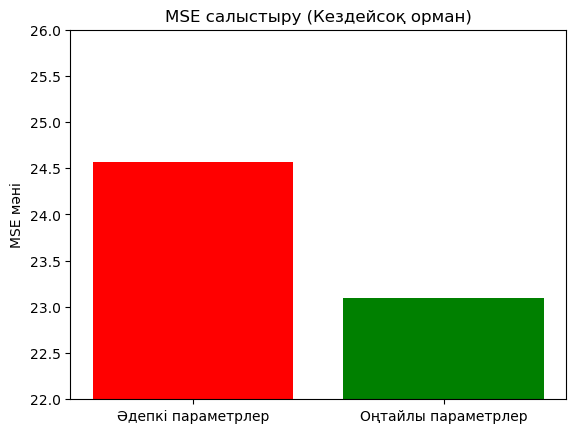

In [39]:
import matplotlib.pyplot as plt

labels = ['Әдепкі параметрлер', 'Оңтайлы параметрлер']
mse_values = [24.57, 23.10]

plt.bar(labels, mse_values, color=['red', 'green'])
plt.ylabel("MSE мәні")
plt.title("MSE салыстыру (Кездейсоқ орман)")
plt.ylim(22, 26)  # Осьтің шекарасын реттеу
plt.show()
